Mean values of each metric by hemorrhage type:
        Mean_HU  Volume_[mL]
Type                        
EDH   55.972682    11.514054
IPH   47.541462    10.248063
SDH   50.312719     6.581266
 
Standard deviation of each metric by hemorrhage type:
        Mean_HU  Volume_[mL]
Type                        
EDH    9.537515    24.975836
IPH    8.581591    22.848984
SDH   12.469281    19.018982
 


(0.0, 90.0)

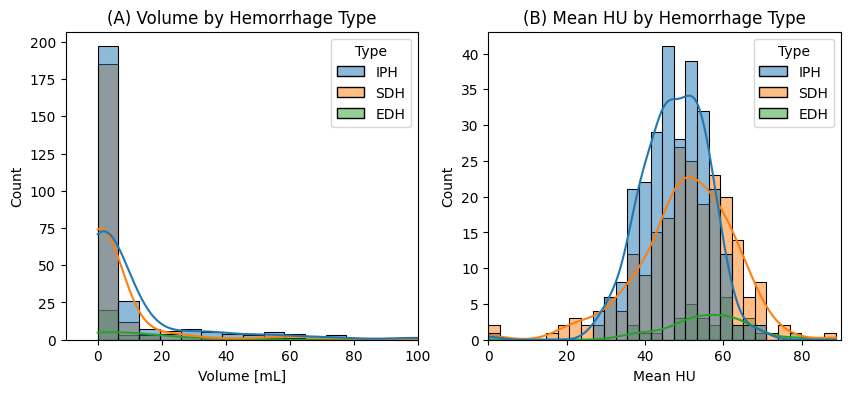

In [1]:
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig_df = pd.read_csv('../datasets/BHSD/BHSD_hemorrhage_characteristics.csv')

# Exclude SAH and IVH subtypes - out of scope for this work
mask = fig_df['Type'] == 'SAH'
fig_df = fig_df[~mask]
mask = fig_df['Type'] == 'IVH'
fig_df = fig_df[~mask]

print('Mean values of each metric by hemorrhage type:')
print(fig_df.groupby(['Type'])[['Mean_HU', 'Volume_[mL]']].mean())
print(' ')
print('Standard deviation of each metric by hemorrhage type:')
print(fig_df.groupby(['Type'])[['Mean_HU', 'Volume_[mL]']].std())
print(' ')

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(ax=axes[0], data=fig_df, x='Volume_[mL]', hue='Type', bins=30, kde=True)
axes[0].set_title('(A) Volume by Hemorrhage Type')
axes[0].set_xlabel('Volume [mL]')
axes[0].set_xlim([-10, 100]) # there is a very small number of hemorrhages with volumes between 100-200 mL, excluding from visualization
sns.histplot(ax=axes[1], data=fig_df, x='Mean_HU', hue='Type', bins=30, kde=True, legend=True)
axes[1].set_title('(B) Mean HU by Hemorrhage Type')
axes[1].set_xlabel('Mean HU')
axes[1].set_xlim([0, 90])

        Name  LesionAttenuation(HU) Subtype  LesionVolume(mL)
0   case_001                     64     SDH         20.221472
1   case_002                     63     IPH          6.726265
2   case_003                     73     SDH          1.137495
3   case_004                     49     SDH         27.211666
4   case_005                     54     EDH          4.935503
5   case_006                     67     SDH         19.789219
6   case_007                     66     EDH         15.291452
7   case_008                     60     SDH         38.417578
8   case_009                     49     EDH         17.864466
9   case_010                     59     SDH          1.840353
10  case_011                     53     IPH          0.725031
11  case_013                     82     EDH          9.124279
12  case_015                     63     EDH         15.859365
13  case_016                     64     EDH         14.121294
14  case_018                     65     SDH         24.312496
15  case

(0.0, 90.0)

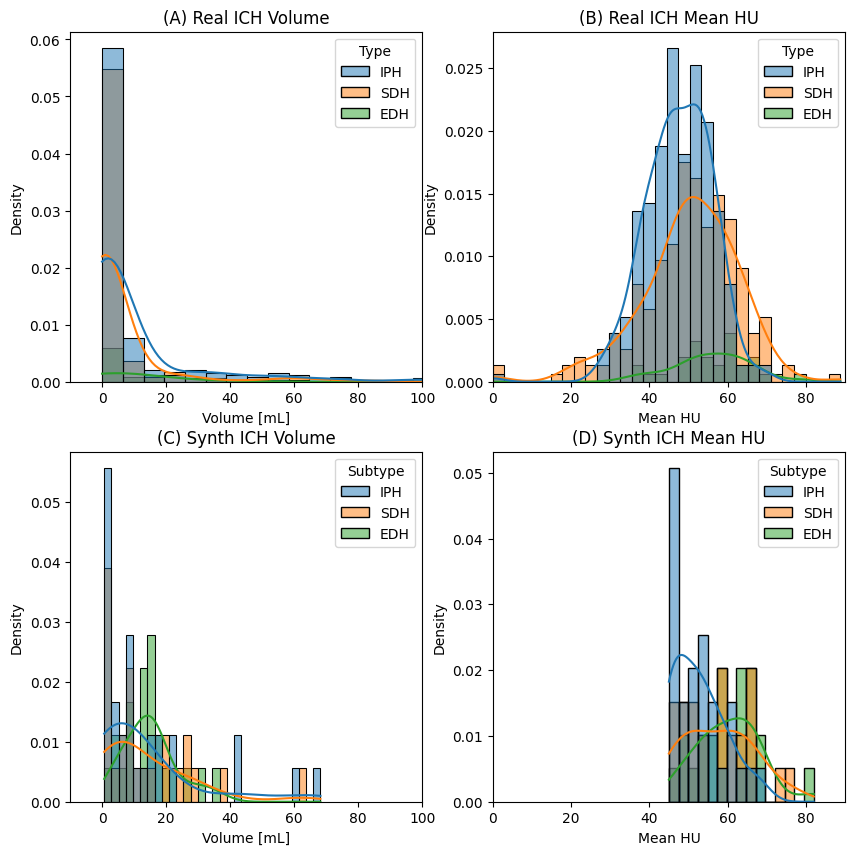

In [2]:
from dotenv import load_dotenv

load_dotenv()
study_name = os.getenv('STUDY_NAME')
base_dir = Path(os.getenv('BASE_DIR')) / study_name

df_1 = pd.read_csv(str(base_dir / study_name) + '_CAD_1_metadata.csv')

df_1['LesionVolume(mL)'] = df_1['LesionVolume(mL)'].apply(lambda x: float(x.split('[')[-1].split(']')[0]))
df_1 = (df_1.groupby(['Name', 'LesionAttenuation(HU)', 'Subtype'])['LesionVolume(mL)'].sum()).reset_index()
df_1['LesionAttenuation(HU)'] = df_1['LesionAttenuation(HU)'].apply(lambda x: float(x.split('[')[-1].split(']')[0])).astype(int)
df_1['Subtype'] = df_1['Subtype'].apply(lambda x: str(x.split("['")[-1].split("']")[0]))

# Plot
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

sns.histplot(ax=axes[0], data=fig_df, x='Volume_[mL]', hue='Type', bins=30, kde=True, hue_order=['IPH', 'SDH', 'EDH'], stat='density')
axes[0].set_title('(A) Real ICH Volume')
axes[0].set_xlabel('Volume [mL]')
axes[0].set_xlim([-10, 100]) # there is a very small number of hemorrhages with volumes between 100-200 mL, excluding from visualization
sns.histplot(ax=axes[1], data=fig_df, x='Mean_HU', hue='Type', bins=30, kde=True, legend=True, stat='density')
axes[1].set_title('(B) Real ICH Mean HU')
axes[1].set_xlabel('Mean HU')
axes[1].set_xlim([0, 90])

print(df_1.to_string())
sns.histplot(ax=axes[2], data=df_1, x='LesionVolume(mL)', hue='Subtype', bins=30, kde=True, hue_order=['IPH', 'SDH', 'EDH'], stat='density')
axes[2].set_title('(C) Synth ICH Volume')
axes[2].set_xlabel('Volume [mL]')
axes[2].set_xlim([-10, 100]) # there is a very small number of hemorrhages with volumes between 100-200 mL, excluding from visualization
sns.histplot(ax=axes[3], data=df_1, x='LesionAttenuation(HU)', hue='Subtype', bins=15, kde=True, legend=True, hue_order=['IPH', 'SDH', 'EDH'], stat='density')
axes[3].set_title('(D) Synth ICH Mean HU')
axes[3].set_xlabel('Mean HU')
axes[3].set_xlim([0, 90])



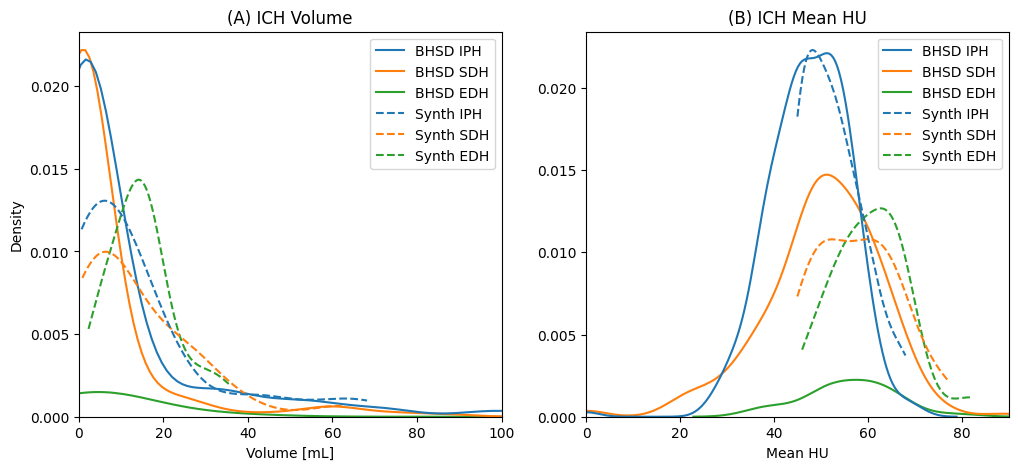

In [3]:
# try for just KDE
import matplotlib

# super ugly but going to whip up a custom legend because the two dataframes can't be easily merged
blue_solid = matplotlib.lines.Line2D([], [], color='tab:blue', marker=None, linestyle='-', label='BHSD IPH')
orange_solid = matplotlib.lines.Line2D([], [], color='tab:orange', marker=None, linestyle='-', label='BHSD SDH')
green_solid = matplotlib.lines.Line2D([], [], color='tab:green', marker=None, linestyle='-', label='BHSD EDH')
blue_dash = matplotlib.lines.Line2D([], [], color='tab:blue', marker=None, linestyle='--', label='Synth IPH')
orange_dash = matplotlib.lines.Line2D([], [], color='tab:orange', marker=None, linestyle='--', label='Synth SDH')
green_dash = matplotlib.lines.Line2D([], [], color='tab:green', marker=None, linestyle='--', label='Synth EDH')

handles = [blue_solid, orange_solid, green_solid, blue_dash, orange_dash, green_dash]
labels = [h.get_label() for h in handles]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes = axes.flatten()
sns.kdeplot(ax=axes[0], data=fig_df, x='Volume_[mL]', hue='Type', legend=False)
sns.kdeplot(ax=axes[0], data=df_1, x='LesionVolume(mL)', hue='Subtype', hue_order=['IPH', 'SDH', 'EDH'], linestyle='--', legend=False, cut=0)
axes[0].set_title('(A) ICH Volume')
axes[0].set_xlabel('Volume [mL]')
axes[0].set_xlim([0, 100]) # there is a very small number of hemorrhages with volumes between 100-200 mL, excluding from visualization
axes[0].legend(handles=handles, labels=labels)

sns.kdeplot(ax=axes[1], data=fig_df, x='Mean_HU', hue='Type', legend=False)
sns.kdeplot(ax=axes[1], data=df_1, x='LesionAttenuation(HU)', hue='Subtype', hue_order=['IPH', 'SDH', 'EDH'], linestyle='--',  legend=False, cut=0)
axes[1].set_title('(B) ICH Mean HU')
axes[1].set_xlabel('Mean HU')
axes[1].set_xlim([0, 90])
axes[1].legend(handles=handles, labels=labels)
axes[1].set_ylabel('')

plt.rcParams.update({'font.size': 20})
plt.savefig('../manuscript_figures/Figure4.png', format='png', dpi=600)

